# 1-4 Mapping stats analysis 
Manuel Jara-Espejo$^{1}$ \
Aboobaker lab, Department of Biology, University of Oxford

## Contents of notebook
1. Introduction
2. Process mapping stats for *Phaw5.0*
3. Process mapping stats for *Phaw5.1* 

## 1. Introduction

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## 2. Process mapping stats for *Phaw5.1*

In [82]:
#Open file containing mapping out file after mapping RNA-seq libraries using HISAT2

%%bash

cd /drives/ssd1/manuel/phaw/2022_analysis/annotation/protein_coding_genes/
head mapping_allAAAlibs.out

Running on library S1
S1
45609500 reads; of these:
  45609500 (100.00%) were paired; of these:
    11400973 (25.00%) aligned concordantly 0 times
    31508330 (69.08%) aligned concordantly exactly 1 time
    2700197 (5.92%) aligned concordantly >1 times
    ----
    11400973 pairs aligned concordantly 0 times; of these:
      569307 (4.99%) aligned discordantly 1 time


In [3]:
#Get library size, alignment rate, unique and multimappers PHAW5.1 as reference
with open("/drives/ssd1/manuel/phaw/2022_analysis/annotation/protein_coding_genes/mapping_allAAAlibs.out") as f:
    output=f.readlines()

bam_files=[]
for line in output:
    if "Running on library" in line:
        bam_files.append(line.rstrip().split(' ')[-1])
#bam_files= set(bam_files)

bam_files_uniq = [] # Remove duplicated lib names keepin the order
for item in bam_files:
    if item not in bam_files_uniq:
        bam_files_uniq.append(item)
bam_files_uniq

bam_size=[]
for line in output:
    if "reads; of these:" in line:
        size=line.rstrip().split(' ')[0]
        bam_size.append(round(int(size)/1e6)) #Store lib size in Mb
        
alignRate=[]
for line in output:
    if "overall alignment rate" in line:
        ratePerc= line.rstrip().split(' ')[0].replace("%","")
        alignRate.append(int(float(ratePerc)))

In [4]:
results_df = pd.DataFrame([bam_files_uniq,bam_size,alignRate],
                          index='bam_files bam_size alignRate'.split())
results_df = results_df.transpose()
results_df.head(10)

,bam_files,bam_size,alignRate
0,S1,46,82
1,S2,25,81
2,S3,34,84
3,S4,35,82
4,S5,26,84
5,S6,29,85
6,S7,31,81
7,S8,30,82
8,S9,22,86
9,P161,22,84


#### Select only RNA-seq PolyA libraries and reorder rows to place replicates together

In [5]:
mapStats_polyALibs = results_df[results_df['bam_files'].str.contains("S|P")]
mapStats_polyALibs = mapStats_polyALibs.reindex([0,3,6,1,4,7,25,26,27,28,29,30,9,10,11,12,13,14,15,16,2,5,8])

#Add sample information column
samples_rep = ['0-9hrs_rep1','0-9hrs_rep2','0-9hrs_rep3','11hrs_rep1','11hrs_rep2','11hrs_rep3','12hrs_rep1','12hrs_rep2','12hrs_rep3','13-14hrs_rep1',
              '13-14hrs_rep2','13-14hrs_rep3','16hrs_rep1','16hrs_rep2','20hrs_rep1','20hrs_rep2','24hrs_rep1','24hrs_rep2','48hrs_rep1','48hrs_rep2','24-60hrs_rep1','24-60hrs_rep2',
              '24-60hrs_rep3']
samples_id = ['0-9hrs','0-9hrs','0-9hrs','11hrs','11hrs','11hrs','12hrs','12hrs','12hrs','13-14hrs',
              '13-14hrs','13-14hrs','16hrs','16hrs','20hrs','20hrs','24hrs','24hrs','48hrs','48hrs','24-60hrs','24-60hrs',
              '24-60hrs']
mapStats_polyALibs['stage_rep'] = samples_rep
mapStats_polyALibs['stage'] = samples_id

mapStats_polyALibs

,bam_files,bam_size,alignRate,stage_rep,stage
0,S1,46,82,0-9hrs_rep1,0-9hrs
3,S4,35,82,0-9hrs_rep2,0-9hrs
6,S7,31,81,0-9hrs_rep3,0-9hrs
1,S2,25,81,11hrs_rep1,11hrs
4,S5,26,84,11hrs_rep2,11hrs
7,S8,30,82,11hrs_rep3,11hrs
25,P121,19,79,12hrs_rep1,12hrs
26,P122,21,81,12hrs_rep2,12hrs
27,P123,20,81,12hrs_rep3,12hrs
28,P141,20,80,13-14hrs_rep1,13-14hrs


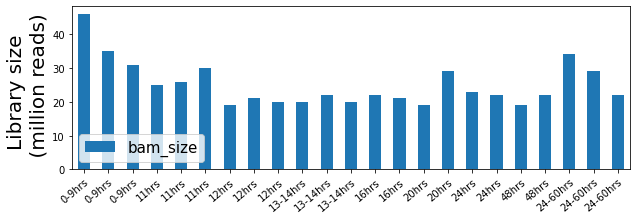

In [13]:
mapStats_polyALibs.plot(x="stage",y= "bam_size",kind="bar",stacked=False,figsize=(10, 3))
plt.ylabel("Library size \n (million reads)",fontsize=20)
plt.xlabel("")
plt.xticks(rotation=40, horizontalalignment="right",rotation_mode='anchor')
plt.legend(loc=3,prop={'size': 15})

### Plot PolyA RNA-seq libraries mapping rate in Phaw5.1

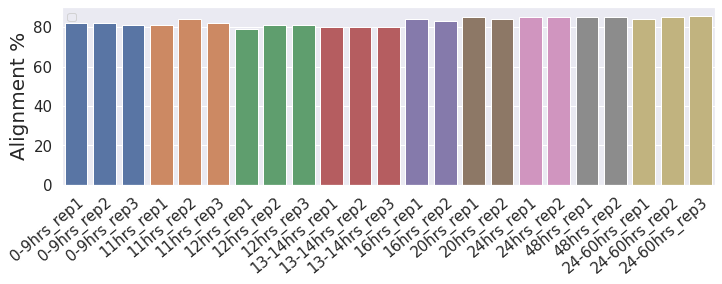

In [14]:
sns.set(rc={'figure.figsize':(11.7,3.27)})

sns.barplot(x="stage_rep",y= "alignRate", data=mapStats_polyALibs, hue='stage', dodge=False)
plt.ylabel("Alignment %",fontsize=20)
plt.xlabel("")
plt.xticks(rotation=40, horizontalalignment="right",rotation_mode='anchor',fontsize=15)
plt.yticks(horizontalalignment="right",rotation_mode='anchor',fontsize=15)
plt.legend('')

plt.savefig('AlignRate_AAApolya.tiff', dpi=600, format="tiff", pil_kwargs={"compression": "tiff_lzw"},bbox_inches = "tight")

### Plot PolyA RNA-seq libraries mapping rate library size in Phaw5.1

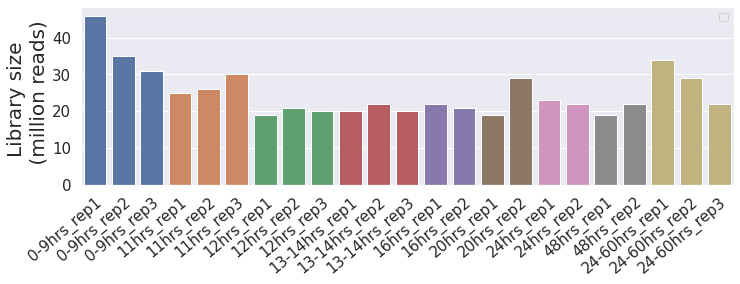

In [16]:
#Plot polyA  library size 

sns.set(rc={'figure.figsize':(11.7,3.27)})

sns.barplot(x="stage_rep",y= "bam_size", data=mapStats_polyALibs, hue='stage', dodge=False)
plt.ylabel("Library size \n (million reads)",fontsize=20)
plt.xlabel("")
plt.xticks(rotation=40, horizontalalignment="right",rotation_mode='anchor',fontsize=15)
plt.yticks(horizontalalignment="right",rotation_mode='anchor',fontsize=15)
plt.legend('')

plt.savefig('Lib_stats_AAApolya.tiff', dpi=600, format="tiff", pil_kwargs={"compression": "tiff_lzw"},bbox_inches = "tight")

#### Select only TOTAL RNA-seq libraries and reorder rows to place replicates together

In [6]:
mapStats_TotalLibs = results_df[results_df['bam_files'].str.contains("T")].reset_index()
mapStats_TotalLibs = mapStats_TotalLibs.reindex([0,3,6,1,4,7,17,18,19,20,21,22,9,10,11,12,13,14,15,16,2,5,8])

mapStats_TotalLibs['stage_rep'] = samples_rep
mapStats_TotalLibs['stage'] = samples_id
mapStats_TotalLibs.head(10)

,index,bam_files,bam_size,alignRate,stage_rep,stage
0,37,T1,33,83,0-9hrs_rep1,0-9hrs
3,40,T4,38,84,0-9hrs_rep2,0-9hrs
6,43,T7,32,84,0-9hrs_rep3,0-9hrs
1,38,T2,32,83,11hrs_rep1,11hrs
4,41,T5,34,86,11hrs_rep2,11hrs
7,44,T8,36,85,11hrs_rep3,11hrs
17,54,T121_Mixed,33,82,12hrs_rep1,12hrs
18,55,T122_Mixed,29,86,12hrs_rep2,12hrs
19,56,T123_Mixed,32,83,12hrs_rep3,12hrs
20,57,T141_Mixed,31,83,13-14hrs_rep1,13-14hrs


### Plot Total RNA-seq libraries mapping rate in Phaw5.1

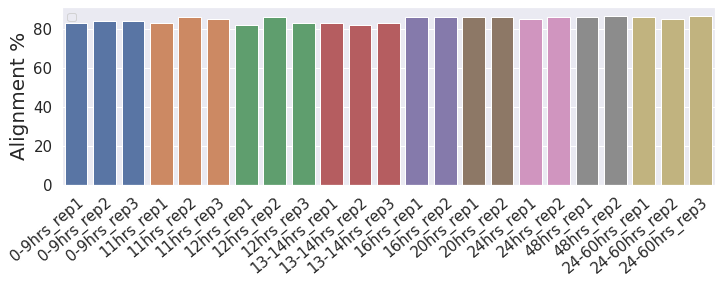

In [24]:
#Plot Total align rate
sns.set(rc={'figure.figsize':(11.7,3.27)})

sns.barplot(x="stage_rep",y= "alignRate", data=mapStats_TotalLibs, hue='stage', dodge=False)
plt.ylabel("Alignment %",fontsize=20)
plt.xlabel("")
plt.xticks(rotation=40, horizontalalignment="right",rotation_mode='anchor',fontsize=15)
plt.yticks(horizontalalignment="right",rotation_mode='anchor',fontsize=15)
plt.legend('')

plt.savefig('AlignRate_AAAtotal.tiff', dpi=600, format="tiff", pil_kwargs={"compression": "tiff_lzw"},bbox_inches = "tight")

### Plot Total RNA-seq libraries size in Phaw5.1

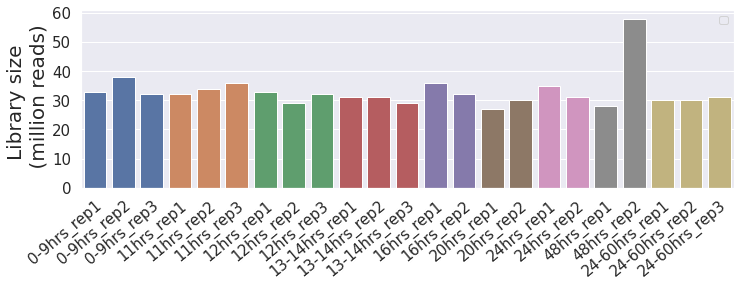

In [7]:
#PLot lib size
sns.set(rc={'figure.figsize':(11.7,3.27)})

sns.barplot(x="stage_rep",y= "bam_size", data=mapStats_TotalLibs, hue='stage', dodge=False)
plt.ylabel("Library size \n (million reads)",fontsize=20)
plt.xlabel("")
plt.xticks(rotation=40, horizontalalignment="right",rotation_mode='anchor',fontsize=15)
plt.yticks(horizontalalignment="right",rotation_mode='anchor',fontsize=15)
plt.legend('')

plt.savefig('Lib_stats_AAAtotal.tiff', dpi=600, format="tiff", pil_kwargs={"compression": "tiff_lzw"},bbox_inches = "tight")

## 3. Process mapping stats for *Phaw5.0* and compare to those from Phaw5.1

In [83]:
#Get library size, alignment rate, unique and multimappers using PHAW5.0 as reference
with open("/drives/ssd1/manuel/phaw/2021_analysis/annotation/mappingStatsall.out") as f:
    output=f.readlines()

bam_files=[]
for line in output:
    if "Running on library" in line:
        bam_files.append(line.rstrip().split(' ')[-1])
#bam_files= set(bam_files)

bam_files_uniq = [] # Remove duplicated lib names keepin the order
for item in bam_files:
    if item not in bam_files_uniq:
        bam_files_uniq.append(item)
bam_files_uniq

bam_size=[]
for line in output:
    if "reads; of these:" in line:
        size=line.rstrip().split(' ')[0]
        bam_size.append(round(int(size)/1e6)) #Store lib size in Mb
        
alignRate=[]
for line in output:
    if "overall alignment rate" in line:
        ratePerc= line.rstrip().split(' ')[0].replace("%","")
        alignRate.append(int(float(ratePerc)))


In [84]:
results2021_df = pd.DataFrame([bam_files_uniq,bam_size,alignRate],
                          index='bam_files bam_size alignRate'.split())
results2021_df =results2021_df.transpose()
results2021_df

,bam_files,bam_size,alignRate
0,S1,46,79
1,S2,25,79
2,S3,34,81
3,S4,35,79
4,S5,26,82
...,...,...,...
85,T122_Mixed,29,81
86,T123_Mixed,32,79
87,T141_Mixed,31,78
88,T142_Mixed,31,78


#### Select only RNA-seq PolyA libraries and reorder rows to place replicates together

In [ ]:
mapStats_polyALibs_2021 = results2021_df[results2021_df['bam_files'].str.contains("S[1-9]|P")]
mapStats_polyALibs_2021 = mapStats_polyALibs_2021.reindex([0,3,6,1,4,7,78,79,80,81,82,83,55,60,56,59,54,58,53,57,2,5,8])
mapStats_polyALibs_2021['stage_rep'] = samples_rep
mapStats_polyALibs_2021['stage'] = samples_id

mapStats_polyALibs_2021.head(12)

### Merge dataframes containg mapping stats for Phaw5.0 and Phaw5.1 assemblies - PolyA DATA

In [87]:
map_stats_merged = pd.merge(mapStats_polyALibs, mapStats_polyALibs_2021, on=['bam_files'])
map_stats_merged['alig_dif'] = map_stats_merged['alignRate_x'] - map_stats_merged['alignRate_y']
map_stats_merged.head()

,bam_files,bam_size_x,alignRate_x,stage_rep_x,stage_x,bam_size_y,alignRate_y,stage_rep_y,stage_y,alig_dif
0,S1,46,82,0-9hrs_rep1,0-9hrs,46,79,0-9hrs_rep1,0-9hrs,3
1,S4,35,82,0-9hrs_rep2,0-9hrs,35,79,0-9hrs_rep2,0-9hrs,3
2,S7,31,81,0-9hrs_rep3,0-9hrs,31,79,0-9hrs_rep3,0-9hrs,2
3,S2,25,81,11hrs_rep1,11hrs,25,79,11hrs_rep1,11hrs,2
4,S5,26,84,11hrs_rep2,11hrs,26,82,11hrs_rep2,11hrs,2


### PLot mapping rate differences- Polya DATA

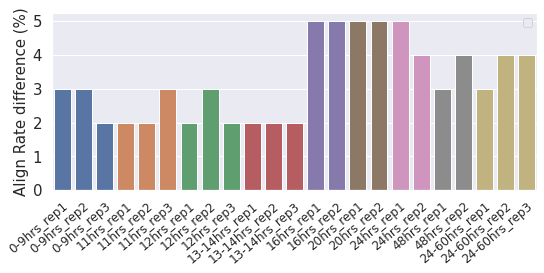

In [89]:
sns.set(rc={'figure.figsize':(8.7,3.27)})

sns.barplot(x="stage_rep_x",y= "alig_dif", data=map_stats_merged, hue='stage_x', dodge=False)
plt.ylabel("Align Rate difference (%)",fontsize=15)
plt.xlabel("")
plt.xticks(rotation=40, horizontalalignment="right",rotation_mode='anchor',fontsize=12)
plt.yticks(horizontalalignment="right",rotation_mode='anchor',fontsize=15)
plt.legend('')

plt.savefig('AlingDif_AAApolya.tiff', dpi=300, format="tiff", pil_kwargs={"compression": "tiff_lzw"},bbox_inches = "tight")

#### Select only RNA-seq TOTAL libraries and reorder rows to place replicates together

In [95]:
mapStats_totalLibs_2021 = results2021_df[results2021_df['bam_files'].str.contains("T")]
mapStats_totalLibs_2021 = mapStats_totalLibs_2021.reindex([61,64,67,62,65,68,84,86,86,87,88,89,70,76,71,75,73,77,72,74,63,66,69])

mapStats_totalLibs_2021['stage_rep'] = samples_rep
mapStats_totalLibs_2021['stage'] = samples_id
mapStats_totalLibs_2021.head(10)

,bam_files,bam_size,alignRate,stage_rep,stage
61,T1,33,80,0-9hrs_rep1,0-9hrs
64,T4,38,81,0-9hrs_rep2,0-9hrs
67,T7,32,81,0-9hrs_rep3,0-9hrs
62,T2,32,80,11hrs_rep1,11hrs
65,T5,34,82,11hrs_rep2,11hrs
68,T8,36,82,11hrs_rep3,11hrs
84,T121_Mixed,33,78,12hrs_rep1,12hrs
86,T123_Mixed,32,79,12hrs_rep2,12hrs
86,T123_Mixed,32,79,12hrs_rep3,12hrs
87,T141_Mixed,31,78,13-14hrs_rep1,13-14hrs


### Merge dataframes containg mapping stats for Phaw5.0 and Phaw5.1 assemblies - TOTAL DATA

In [96]:
map_stats_merged = pd.merge(mapStats_TotalLibs, mapStats_totalLibs_2021, on=['bam_files'])
map_stats_merged['alig_dif'] = map_stats_merged['alignRate_x'] - map_stats_merged['alignRate_y']
map_stats_merged

,index,bam_files,bam_size_x,alignRate_x,stage_rep_x,stage_x,bam_size_y,alignRate_y,stage_rep_y,stage_y,alig_dif
0,37,T1,33,83,0-9hrs_rep1,0-9hrs,33,80,0-9hrs_rep1,0-9hrs,3
1,40,T4,38,84,0-9hrs_rep2,0-9hrs,38,81,0-9hrs_rep2,0-9hrs,3
2,43,T7,32,84,0-9hrs_rep3,0-9hrs,32,81,0-9hrs_rep3,0-9hrs,3
3,38,T2,32,83,11hrs_rep1,11hrs,32,80,11hrs_rep1,11hrs,3
4,41,T5,34,86,11hrs_rep2,11hrs,34,82,11hrs_rep2,11hrs,4
5,44,T8,36,85,11hrs_rep3,11hrs,36,82,11hrs_rep3,11hrs,3
6,54,T121_Mixed,33,82,12hrs_rep1,12hrs,33,78,12hrs_rep1,12hrs,4
7,56,T123_Mixed,32,83,12hrs_rep3,12hrs,32,79,12hrs_rep2,12hrs,4
8,56,T123_Mixed,32,83,12hrs_rep3,12hrs,32,79,12hrs_rep3,12hrs,4
9,57,T141_Mixed,31,83,13-14hrs_rep1,13-14hrs,31,78,13-14hrs_rep1,13-14hrs,5


In [97]:
### PLot mapping rate differences- total RNA-seq DATA

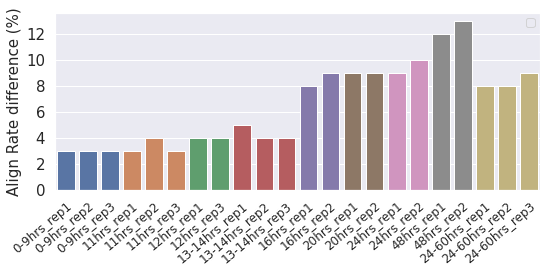

In [98]:
#PLot mapping rate differences- Total
sns.set(rc={'figure.figsize':(8.7,3.27)})

sns.barplot(x="stage_rep_x",y= "alig_dif", data=map_stats_merged, hue='stage_x', dodge=False)
plt.ylabel("Align Rate difference (%)",fontsize=15)
plt.xlabel("")
plt.xticks(rotation=40, horizontalalignment="right",rotation_mode='anchor',fontsize=12)
plt.yticks(horizontalalignment="right",rotation_mode='anchor',fontsize=15)
plt.legend('')

plt.savefig('AlingDif_AAAtotal.tiff', dpi=300, format="tiff", pil_kwargs={"compression": "tiff_lzw"},bbox_inches = "tight")